In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from IPython.display import display

In [4]:
# Load Dataset 
df = pd.read_csv('../data/df_file.csv')

In [11]:
# Display Basic Info
print("Dataset Overview")
display(df.head())

Dataset Overview


,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [6]:
# Display Dataset Shape
print("\nDataset Shape:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")


Dataset Shape:
Number of Rows: 2225
Number of Columns: 2


In [7]:
# Display Column Names and Data Types
print("\nColumn Names and Data Types:")
print(df.dtypes)


Column Names and Data Types:
Text     object
Label     int64
dtype: object


In [12]:
# Step 1: Text Preprocessing
print("# Step 1: Text Preprocessing - Tokenization & Vectorization")
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])

# Step 1: Text Preprocessing - Tokenization & Vectorization


In [13]:
# Convert TF-IDF Matrix to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("## Sample TF-IDF Values")
display(tfidf_df.head())

## Sample TF-IDF Values


,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.105936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 2: Word Cloud Visualization


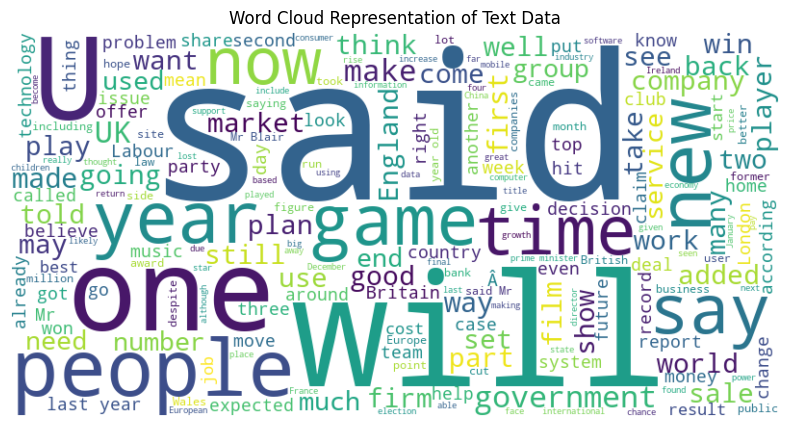

In [14]:
# Step 2: Word Cloud Visualization
print("# Step 2: Word Cloud Visualization")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Representation of Text Data")
plt.show()

# Step 3: Term Frequency Heatmap (Improved)


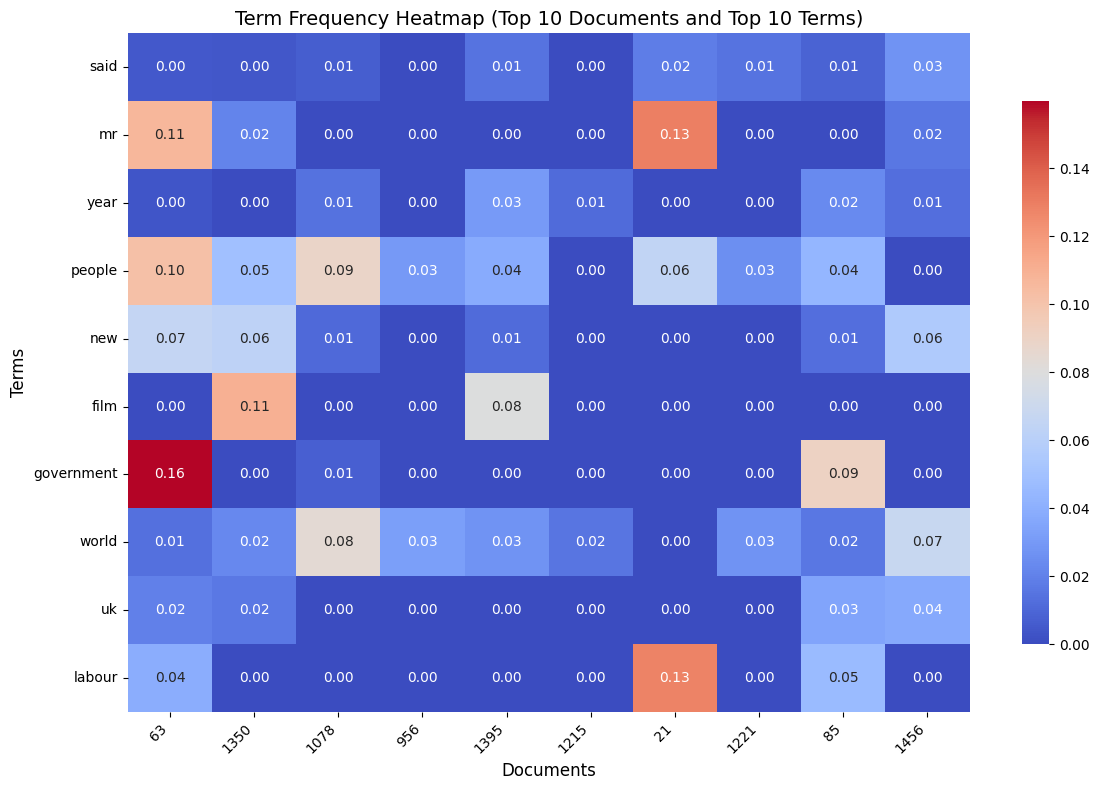

In [17]:
# Step 3: Term Frequency Heatmap 
print("# Step 3: Term Frequency Heatmap (Improved)")

# Select top 10 documents and top 10 terms for visualization
top_documents = 10  
top_terms = 10      

top_terms_indices = tfidf_df.mean(axis=0).sort_values(ascending=False).index[:top_terms]

top_documents_indices = tfidf_df.mean(axis=1).sort_values(ascending=False).index[:top_documents]

# Create a subset of the TF-IDF matrix for visualization
tfidf_subset = tfidf_df.loc[top_documents_indices, top_terms_indices]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    tfidf_subset.T,  
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    annot_kws={'size': 10},  
    cbar_kws={'shrink': 0.8}  
)
plt.title("Term Frequency Heatmap (Top 10 Documents and Top 10 Terms)", fontsize=14)
plt.xlabel("Documents", fontsize=12)
plt.ylabel("Terms", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout() 
plt.show()

# Step 4: Inverse Document Frequency (IDF) Analysis


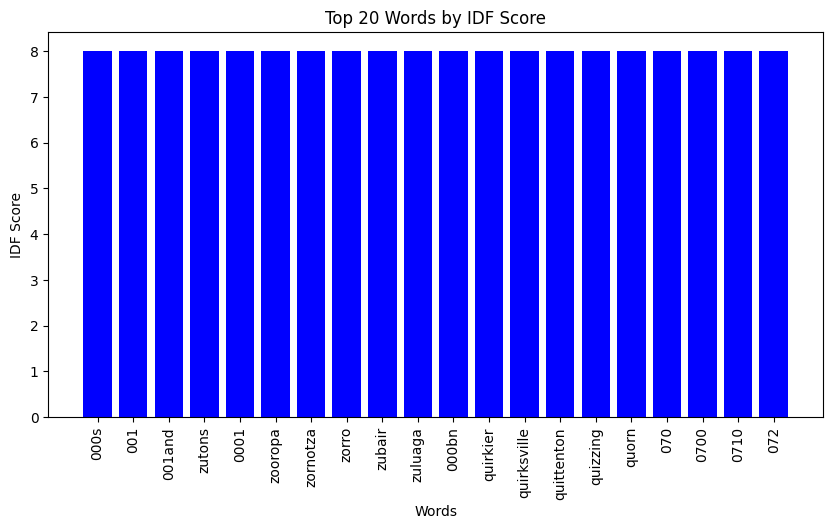

In [18]:
# Step 4: Inverse Document Frequency (IDF) Calculation & Visualization
print("# Step 4: Inverse Document Frequency (IDF) Analysis")
idf_values = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
idf_df = pd.DataFrame(list(idf_values.items()), columns=['Word', 'IDF']).sort_values(by='IDF', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(idf_df['Word'][:20], idf_df['IDF'][:20], color='blue')
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("IDF Score")
plt.title("Top 20 Words by IDF Score")
plt.show()

# Step 5: TF-IDF Score Distribution


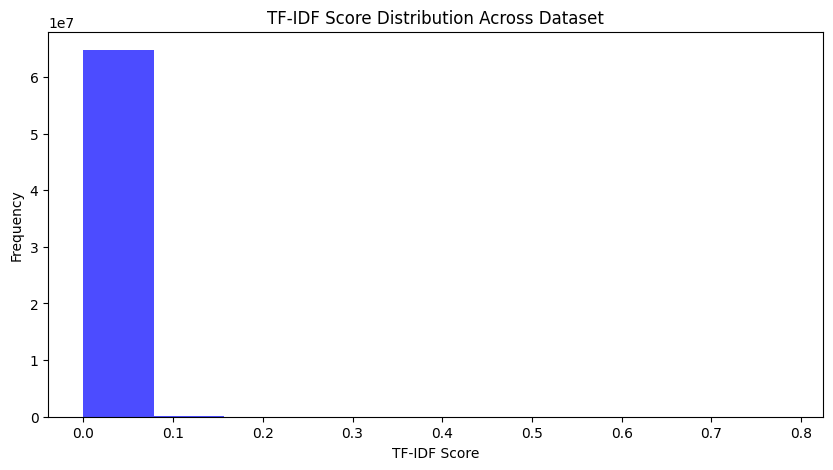

In [22]:
# Step 5: TF-IDF Score Distribution
print("# Step 5: TF-IDF Score Distribution")
plt.figure(figsize=(10, 5))
plt.hist(X.toarray().flatten(), bins=10, color='blue', alpha=0.7)
plt.xlabel("TF-IDF Score")
plt.ylabel("Frequency")
plt.title("TF-IDF Score Distribution Across Dataset")
plt.show()

In [23]:
# Step 6: Search Functionality - Retrieving Top 3 Relevant Documents
def search_documents(query, top_n=3):
    """
    Given a query, computes similarity scores and retrieves the top N most relevant documents.
    """
    query_vector = vectorizer.transform([query])
    similarity_scores = np.dot(X.toarray(), query_vector.toarray().T).flatten()
    top_indices = np.argsort(similarity_scores)[::-1][:top_n]
    
    print(f"## Top {top_n} Most Relevant Documents for Query: '{query}'")
    results = []
    for idx in top_indices:
        results.append({
            "Document ID": idx + 1,
            "Text": df.iloc[idx]['Text'],
            "Similarity Score": similarity_scores[idx]
        })
    results_df = pd.DataFrame(results)
    display(results_df)
    
    # Visualization of Similarity Scores
    plt.figure(figsize=(8, 4))
    plt.bar(results_df['Document ID'], results_df['Similarity Score'], color='green')
    plt.xlabel("Document ID")
    plt.ylabel("Cosine Similarity Score")
    plt.title(f"Similarity Scores for Query: '{query}'")
    plt.show()